# Average  information  entropy  (AIE)

In [1]:
import math
import numpy as np
import cv2
from scipy import special
import matplotlib.pyplot as plt

In [2]:
def entropy(pk,
            base,
            axis
            ):
    
    if base is not None and base <= 0:
        raise ValueError("`base` must be a positive number or `None`.")

    pk = np.asarray(pk)
    pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)
    vec = special.entr(pk)
   
    S = np.sum(vec, axis=axis)
    if base is not None:
        S /= np.log(base)
    return S

In [3]:
from collections import Counter

def entropy2(data):

    counts = Counter()

    for d in data:
        counts[d] += 1

    ent = 0

    probs = [float(c) / len(data) for c in counts.values()]
    for p in probs:
        if p > 0.:
            ent -= p * math.log(p, 2)

    return ent

In [4]:
def vpmi(image):
    image_r = image.copy()
    image_r[:, :, 1] = 0
    image_r[:, :, 0] = 0


    image_g = image.copy()
    image_g[:, :, 0] = 0
    image_g[:, :, 2] = 0

    image_b = image.copy()
    image_b[:, :, 1] = 0
    image_b[:, :, 2] = 0
    
    gray_image_r = cv2.cvtColor(image_r, cv2.COLOR_BGR2GRAY)
    gray_image_g = cv2.cvtColor(image_g, cv2.COLOR_BGR2GRAY)
    gray_image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)
    
    _bins = 128
    histr, _ = np.histogram(gray_image_r.ravel(), bins=_bins, range=(0, _bins))
    histg, _ = np.histogram(gray_image_g.ravel(), bins=_bins, range=(0, _bins))
    histb, _ = np.histogram(gray_image_b.ravel(), bins=_bins, range=(0, _bins))
    
    prob_distr = histr / histr.sum()
    prob_distg = histg / histg.sum()
    prob_distb = histb / histb.sum()
    
    image_r_entropy = entropy(prob_distr, base=2,axis=0)
    image_g_entropy = entropy(prob_distg, base=2,axis=0)
    image_b_entropy = entropy(prob_distb, base=2,axis=0)
    
   # image_r_entropy = entropy2(prob_distr)
    #image_g_entropy = entropy2(prob_distg)
    #image_b_entropy = entropy2(prob_distb )
    
    average_ie = np.sqrt(( pow(image_r_entropy,2) + pow(image_g_entropy,2) + pow(image_b_entropy,2) ) / 3)
    
    
    ##ABWF
    
    bwfr = ( np.max(image_r) - np.min(image_r) + 1) / 256
    bwfg = (np.max(image_g) - np.min(image_g) + 1) / 256
    bwfb = (np.max(image_b) - np.min(image_b) + 1) / 256
    
    average_bwf = np.sqrt(( pow(bwfr,2) + pow(bwfg,2) + pow(bwfb,2) ) / 3)
    
    ##ACLF
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for channel_id in range(3):
        histogram, bin_edges = np.histogram(
        image_rgb[:, :, channel_id], bins=256, range=(0, 256)
        )
        if(channel_id==0):
            clfr = (1/256) * np.count_nonzero(histogram)
        elif(channel_id==1):
            clfg = (1/256) * np.count_nonzero(histogram)
        else :
            clfb = (1/256) * np.count_nonzero(histogram)
            
    
    average_clf = np.sqrt(( pow(clfr,2) + pow(clfg,2) + pow(clfb,2) ) / 3)
  
    
    return average_ie , average_bwf, average_clf
    

In [5]:
#from scipy.linalg import bandwidth
from sympy import diff
def vpmi2(image):
    
    ##AIE
    
    image_r = image[:,:,2]
    image_g = image[:,:,1]
    image_b = image[:,:,0]

    
    #gray_image_r = cv2.cvtColor(image_r, cv2.COLOR_BGR2GRAY)
    #gray_image_g = cv2.cvtColor(image_g, cv2.COLOR_BGR2GRAY)
    #gray_image_b = cv2.cvtColor(image_b, cv2.COLOR_BGR2GRAY)
    
    _bins = 128
   # histr, _ = np.histogram(gray_image_r.ravel(), bins=_bins, range=(0, _bins))
   # histg, _ = np.histogram(gray_image_g.ravel(), bins=_bins, range=(0, _bins))
   # histb, _ = np.histogram(gray_image_b.ravel(), bins=_bins, range=(0, _bins))

    histr, _ = np.histogram(image_r.ravel(), bins=_bins, range=(0, _bins))
    histg, _ = np.histogram(image_g.ravel(), bins=_bins, range=(0, _bins))
    histb, _ = np.histogram(image_b.ravel(), bins=_bins, range=(0, _bins))
    
    prob_distr = histr / histr.sum()
    prob_distg = histg / histg.sum()
    prob_distb = histb / histb.sum()
    
    image_r_entropy = entropy(prob_distr, base=2,axis=0)
    image_g_entropy = entropy(prob_distg, base=2,axis=0)
    image_b_entropy = entropy(prob_distb, base=2,axis=0)
    
   # image_r_entropy = entropy2(prob_distr)
    #image_g_entropy = entropy2(prob_distg)
    #image_b_entropy = entropy2(prob_distb )
    
    average_ie = np.sqrt(( pow(((image_r_entropy +image_g_entropy + image_b_entropy) / 3),2) ))
    
    
    ##ABWF
    
    #bwfr = ( np.max(image_r) - np.min(image_r) + 1) / 256
    #bwfg = (np.max(image_g) - np.min(image_g) + 1) / 256
    #bwfb = (np.max(image_b) - np.min(image_b) + 1) / 256
    
    #bwfr = (bandwidth(image_r)[1] - (bandwidth(image_r)[0]) + 1 ) / 256
    #bwfg = (bandwidth(image_g)[1] - (bandwidth(image_g)[0]) + 1 ) / 256
    #bwfb = (bandwidth(image_b)[1] - (bandwidth(image_b)[0]) + 1 ) / 256
    
    bwfr = np.average((image_r[:,-1] - image_r[:,0] + 1 ) / 256)
    bwfg = np.average((image_g[:,-1] - image_g[:,0] + 1 ) / 256)
    bwfb = np.average((image_b[:,-1] - image_b[:,0] + 1 ) / 256)
  
    average_bwf =  np.sqrt(( pow(((bwfr +bwfg + bwfb )/ 3),2) ) )
    
    ## ACLF
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    for channel_id in range(3):
        histogram, bin_edges = np.histogram(
        image_rgb[:, :, channel_id], bins=256, range=(0, 256)
        )
        if(channel_id==0):
            clfr = (1/256) * np.count_nonzero(histogram)
        elif(channel_id==1):
            clfg = (1/256) * np.count_nonzero(histogram)
        else :
            clfb = (1/256) * np.count_nonzero(histogram)
            
    
    average_clf = np.sqrt(( pow(((clfr +clfg + clfb)/ 3),2) ) )
    
    ## AL
    
    triple_image_r = image.copy()
    triple_image_r[:, :, 1] = 0
    triple_image_r[:, :, 0] = 0


    triple_image_g = image.copy()
    triple_image_g[:, :, 0] = 0
    triple_image_g[:, :, 2] = 0

    triple_image_b = image.copy()
    triple_image_b[:, :, 1] = 0
    triple_image_b[:, :, 2] = 0
    
    lumr =  cv2.cvtColor(triple_image_r, cv2.COLOR_BGR2HSV)[...,2] 
    lumg = cv2.cvtColor(triple_image_g, cv2.COLOR_BGR2HSV)[...,2] 
    lumb = cv2.cvtColor(triple_image_b, cv2.COLOR_BGR2HSV)[...,2] 
    
    al_lumr = np.average( cv2.cvtColor(triple_image_r, cv2.COLOR_BGR2HSV)[...,2] )
    al_lumg = np.average(cv2.cvtColor(triple_image_g, cv2.COLOR_BGR2HSV)[...,2] )
    al_lumb = np.average(cv2.cvtColor(triple_image_b, cv2.COLOR_BGR2HSV)[...,2] )
    #print(lumr.shape)
   # print("\n")
    #print(al_lumr)
    average_al = (al_lumr + al_lumg + al_lumb) / 3
    average_al_op = 127.5
    ## LNPF 
    #print(average_al)
    lnpf = 1 - (abs((average_al-average_al_op))/average_al_op)
    
    ##AG
    agr = 0
    agb = 0
    agg = 0
    
 #   for x in range(image.shape[0]-1):
  #      for y in range(image.shape[1]-1):
      #      if (x==0 or y==0):
             #   cr = diff(lumr[x][y],x) + diff(lumr[x][y],y) 
              #  cg = diff(lumg[x][y],x) + diff(lumg[x][y],y) 
              #  cb = diff(lumb[x][y],x) + diff(lumb[x][y],y) 
              #  agr += cr
               # agb += cb
              #  agg += cg
           # else:
            #    cr = (np.gradient(lumr[x][y]/x) + np.gradient(lumr[x][y]/y)) - (np.gradient(lumr[x-1][y-1]/x-1) + np.gradient(lumr[x-1][y-1]/y-1))
             #   cg = (np.gradient(lumg[x][y]/x) + np.gradient(lumg[x][y]/y)) - (np.gradient(lumg[x-1][y-1]/x-1) + np.gradient(lumg[x-1][y-1]/y-1))
              #  cb = (np.gradient(lumb[x][y]/x) + np.gradient(lumb[x][y]/y)) - (np.gradient(lumb[x-1][y-1]/x-1) + np.gradient(lumb[x-1][y-1]/y-1))
              #  agr += cr
               # agb += cb
               # agg += cg
            
    #print(agr)
    ##VPMI
    
    return average_ie , average_bwf, average_clf, average_al , lnpf
    
def ag(image):
    image_r = image[:,:,2]
    image_g = image[:,:,1]
    image_b = image[:,:,0]
    
    # Calculate luminance for each channel
    lumr = 0.299 * image_r
    lumg = 0.587 * image_g
    lumb = 0.114 * image_b
    
    def calculate_gradient(luminance, direction='x'):
        # Calculate the gradient in the specified direction (x or y)
        if direction == 'x':
            gradient = np.gradient(luminance, axis=1)
            #gradient = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=1)
        elif direction == 'y':
            gradient = np.gradient(luminance, axis=0)
            #gradient = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=1)
        else:
            raise ValueError("Invalid direction. Use 'x' or 'y'.")

        return gradient

    def calculate_magnitude(gradient_x, gradient_y, p, mu):
        # Calculate the magnitude of the gradient
        magnitude = 1 / np.sqrt(2) * np.sqrt((gradient_x)**2 + (gradient_y)**2)
        return magnitude

    def calculate_average_gradient(gradient_x, gradient_y, M, N):
        # Calculate the average gradient AG
        ag = np.sum(abs(gradient_x - np.roll(gradient_x, shift=(1, 1), axis=(0, 1)))) + \
             np.sum(abs(gradient_y - np.roll(gradient_y, shift=(1, 1), axis=(0, 1))))

        return ag / (M * N)
   
    def calculate_each_channel(lum_c):
        gradient_x = calculate_gradient(lum_c,'x')
        gradient_y = calculate_gradient(lum_c,'y')
        
        M,N = lum_c.shape
        ag = calculate_average_gradient(gradient_x,gradient_y,M,N)
        return ag
    
    agr = calculate_each_channel(lumr)
    agg = calculate_each_channel(lumg)
    agb = calculate_each_channel(lumb)
    avg_g = np.sqrt(1/3*(agr**2 + agb**2 + agg**2))
    
    #gr_x = calculate_gradient(lumb,'x')
    #gr_y = calculate_gradient(lumb,'y')
    return avg_g

Text(0.5, 1.0, 'AG : 0.714723567956135')

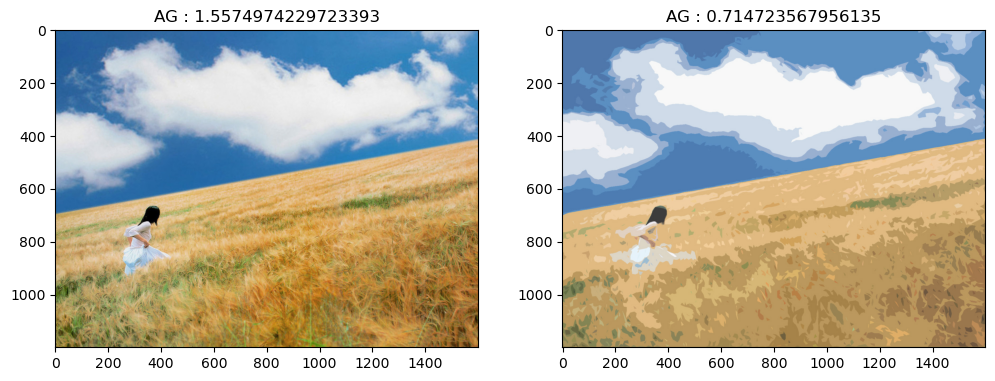

In [ ]:
image1_path = './2a.jpg' #AIE 7.45 ABWF 1 ACLF 0.963
image2_path = './2b.jpg' #AIE 1.85 ABWF 1 ACLF 0.0195
image3_path = './2c.jpg' #AIE 0.2273 ABWF 0.5 ACLF -
image4_path = './2d.jpg' #AIE 0.2273 ABWF 1 ACLF -

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)
image3 = cv2.imread(image3_path)
image4 = cv2.imread(image4_path)

ag1 = ag(image1)
ag2 = ag(image2)

plt.figure(figsize = [12,8])
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
plt.title(f'AG : {ag1}')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
plt.title(f'AG : {ag2}')

In [7]:
aie1,abwf1,aclf1,aal1,lnpf1= vpmi2(image1)
aie2,abwf2,aclf2,aal2,lnpf2 = vpmi2(image2)
aie3,abwf3,aclf3,aal3,lnpf3 = vpmi2(image3)
aie4,abwf4,aclf4,aal4,lnpf4 = vpmi2(image4)

(-0.5, 1599.5, 1199.5, -0.5)

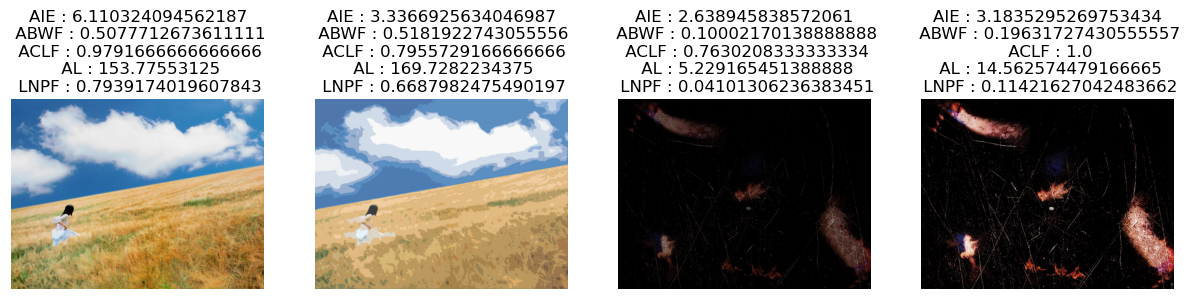

In [8]:
_bins = 128
plt.figure(figsize=(15, 15))

n_row = 1
n_col = 4

plt.subplot(n_row,n_col,1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('AIE : ' + str(aie1) + '\n ABWF : ' + str(abwf1) + '\n ACLF : ' + str(aclf1) + '\n AL : ' + str(aal1) + '\n LNPF : ' + str(lnpf1))
plt.axis('off')

plt.subplot(n_row,n_col,2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('AIE : ' + str(aie2) + '\n ABWF : ' + str(abwf2) + '\n ACLF : ' + str(aclf2) + '\n AL : ' + str(aal2) + '\n LNPF : ' + str(lnpf2))
plt.axis('off')

plt.subplot(n_row,n_col,3)
plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))
plt.title('AIE : ' + str(aie3) + '\n ABWF : ' + str(abwf3) + '\n ACLF : ' + str(aclf3) + '\n AL : ' + str(aal3) + '\n LNPF : ' + str(lnpf3))
plt.axis('off')

plt.subplot(n_row,n_col,4)
plt.imshow(cv2.cvtColor(image4, cv2.COLOR_BGR2RGB))
plt.title('AIE : ' + str(aie4) + '\n ABWF : ' + str(abwf4) + '\n ACLF : ' + str(aclf4) + '\n AL : ' + str(aal4) + '\n LNPF : ' + str(lnpf4))
plt.axis('off')




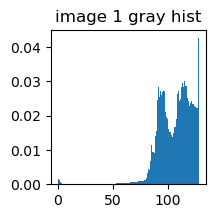

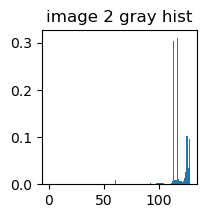

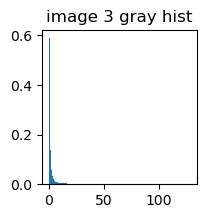

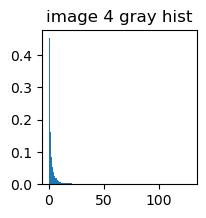

In [9]:
_bins = 128

f, axs = plt.subplots( figsize=(2, 2))
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.title('image 1 gray hist')
plt.hist(gray_image1.ravel(), bins=_bins, range=(0, _bins), density = True)
plt.show()

f, axs = plt.subplots( figsize=(2, 2))
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.title('image 2 gray hist')
plt.hist(gray_image2.ravel(), bins=_bins, range=(0, _bins), density = True)
plt.show()

f, axs = plt.subplots( figsize=(2, 2))
gray_image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
plt.title('image 3 gray hist')
plt.hist(gray_image3.ravel(), bins=_bins, range=(0, _bins), density = True)
plt.show()

f, axs = plt.subplots( figsize=(2, 2))
gray_image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)
plt.title('image 4 gray hist')
plt.hist(gray_image4.ravel(), bins=_bins, range=(0, _bins), density = True)
plt.show()